In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np  

%matplotlib inline


## importando dados do dataset para um dataframe
df = pd.read_csv('telecom_churn_synthetic.csv') 

## formato do dataframe
print("forma do dataframe (linhas x colunas):")
df .shape   

forma do dataframe (linhas x colunas):


(6000, 27)

CARREGANDO O DATASET

In [2]:
#importando dados do dataset para um dataframe
df = pd.read_csv('telecom_churn_synthetic.csv') 

## formato do dataframe
print("forma do dataframe (linhas x colunas):")
df .shape 
    

forma do dataframe (linhas x colunas):


(6000, 27)

In [3]:
##visualizando o cabeçalho das colunas  (nome dos atributos)
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure_months', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges',
       'complaints_last_3m', 'outages_last_3m', 'avg_download_mbps',
       'late_payments_last_6m', 'promo_active', 'discount_pct', 'churn'],
      dtype='object')

| Coluna | Descrição | Tipo de Dado |
| :--- | :--- | :--- |
| **customer_id** | Identificador único do cliente. | Categórico/ID |
| **gender** | Gênero do cliente. | Categórico |
| **senior_citizen** | Indica se o cliente é idoso (1: Sim, 0: Não). | Numérico/Binário |
| **partner** | Se o cliente possui parceiro(a). | Categórico |
| **dependents** | Se o cliente possui dependentes. | Categórico |
| **tenure_months** | Tempo de permanência na empresa (em meses). | Numérico/Inteiro |
| **phone_service** | Assinatura de serviço telefônico. | Categórico |
| **multiple_lines** | Se possui múltiplas linhas telefônicas. | Categórico |
| **internet_service** | Tipo de tecnologia de internet (DSL, Fibra, etc.). | Categórico |
| **online_security** | Serviço de segurança online adicional. | Categórico |
| **online_backup** | Serviço de backup em nuvem. | Categórico |
| **device_protection** | Seguro para dispositivos/aparelhos. | Categórico |
| **tech_support** | Assinatura de suporte técnico prioritário. | Categórico |
| **streaming_tv** | Uso de serviço de TV via streaming. | Categórico |
| **streaming_movies** | Uso de serviço de filmes via streaming. | Categórico |
| **contract** | Tipo de contrato (Mensal, 1 ano, 2 anos). | Categórico |
| **paperless_billing** | Faturamento digital (sem papel). | Categórico |
| **payment_method** | Método de pagamento utilizado. | Categórico |
| **monthly_charges** | Valor total da fatura mensal atual. | Numérico/Float |
| **total_charges** | Valor total acumulado pago pelo cliente. | Numérico/Float |
| **complaints_last_3m** | Quantidade de reclamações nos últimos 3 meses. | Numérico |
| **outages_last_3m** | Quantidade de quedas de sinal nos últimos 3 meses. | Numérico |
| **avg_download_mbps** | Velocidade média de download em Mbps. | Numérico |
| **late_payments_last_6m** | Quantidade de pagamentos em atraso nos últimos 6 meses. | Numérico |
| **promo_active** | Indica se o cliente está sob alguma promoção. | Categórico/Binário |
| **discount_pct** | Porcentagem de desconto aplicada. | Numérico/Percentual |
| **churn** | **Target:** Se o cliente cancelou o serviço (1: Sim, 0: Não). | Numérico/Binário |

## 1. Verificando Tipos de Dados e Valores Nulos
Agora que carregamos os dados, precisamos entender:
1. Se existem valores faltando (nulos) que precisam ser tratados.
2. Quais colunas são texto (object) e quais são números (int/float).


In [4]:
# Mostra informações detalhadas sobre tipos e nulos
df.info()

# Exibe estatísticas descritivas (média, min, max) das colunas numéricas
display(df.describe())

# Verifica valores nulos explicitamente
print("\nTotal de valores nulos por coluna:")
print(df.isnull().sum()[df.isnull().sum() > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            6000 non-null   object 
 1   gender                 6000 non-null   object 
 2   senior_citizen         6000 non-null   int64  
 3   partner                6000 non-null   object 
 4   dependents             6000 non-null   object 
 5   tenure_months          6000 non-null   int64  
 6   phone_service          6000 non-null   object 
 7   multiple_lines         6000 non-null   object 
 8   internet_service       6000 non-null   object 
 9   online_security        6000 non-null   object 
 10  online_backup          6000 non-null   object 
 11  device_protection      6000 non-null   object 
 12  tech_support           6000 non-null   object 
 13  streaming_tv           6000 non-null   object 
 14  streaming_movies       6000 non-null   object 
 15  cont

,senior_citizen,tenure_months,monthly_charges,total_charges,complaints_last_3m,outages_last_3m,avg_download_mbps,late_payments_last_6m,discount_pct,churn
count,6000.000000,6000.000000,6000.000000,5926.000000,6000.000000,6000.000000,5954.000000,6000.000000,6000.000000,6000.000000
mean,0.156500,28.685000,69.063478,1977.805548,0.408833,0.470167,85.650420,0.389500,3.272383,0.140500
std,0.363359,22.306495,28.521629,1860.606539,0.654288,0.701089,77.047655,0.659188,6.152472,0.347534
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,50.870000,468.655000,0.000000,0.000000,21.800000,0.000000,0.000000,0.000000
50%,0.000000,24.000000,72.640000,1303.255000,0.000000,0.000000,48.400000,0.000000,0.000000,0.000000
75%,0.000000,47.250000,89.690000,3166.367500,1.000000,1.000000,154.300000,1.000000,3.300000,0.000000
max,1.000000,72.000000,140.000000,9809.360000,5.000000,5.000000,330.000000,5.000000,35.000000,1.000000



Total de valores nulos por coluna:
total_charges        74
avg_download_mbps    46
dtype: int64


## 2. Análise de Hipótese: O Tipo de Contrato influencia o Churn?
Vamos validar a hipótese de que contratos mensais ("Month-to-month") têm maior taxa de cancelamento do que contratos de longo prazo.


Taxa de Churn por Tipo de Contrato (%):


churn,0,1
contract,,
Month-to-month,80.426414,19.573586
One year,92.771982,7.228018
Two year,93.364559,6.635441


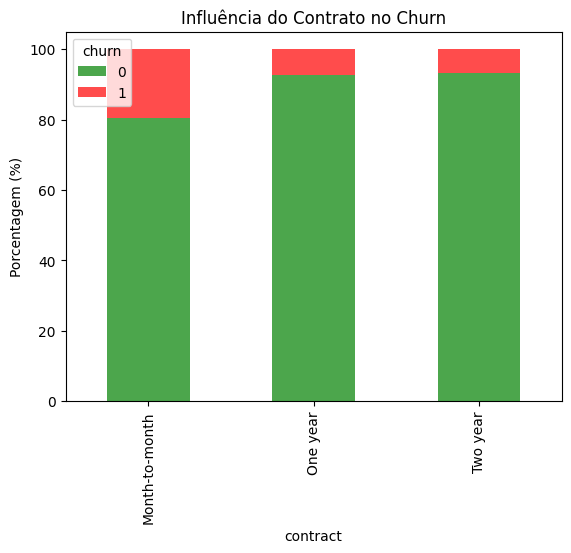

In [5]:
# Tabela cruzada normalizada (mostra a % de churn dentro de cada tipo de contrato)
churn_por_contrato = pd.crosstab(df['contract'], df['churn'], normalize='index') * 100

print("Taxa de Churn por Tipo de Contrato (%):")
display(churn_por_contrato)

# Gráfico para visualizar essa diferença (Opcional, mas recomendado)
churn_por_contrato.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)
plt.title('Influência do Contrato no Churn')
plt.ylabel('Porcentagem (%)')
plt.show()


## 3. Engenharia de Atributos (Feature Engineering)

### Mapeamento Ordinal
A variável `contract` possui uma hierarquia lógica:
*   Mensal (Menor compromisso) < 1 Ano < 2 Anos (Maior compromisso).

Para que o modelo entenda essa ordem, vamos transformar essas categorias em números (1, 2, 3) manualmente, em vez de usar *One-Hot Encoding*.


In [6]:
# 1. Criar o dicionário de mapeamento
contract_map = {
    "Month-to-month": 1,
    "One year": 2,
    "Two year": 3
}

# 2. Aplicar o mapeamento em uma nova coluna
df['contract_ordinal'] = df['contract'].map(contract_map)

# 3. Criar interação entre tempo de casa e contrato (conforme sugestão da aula)
df['tenure_x_contract'] = df['tenure_months'] * df['contract_ordinal']

# Verificando o resultado
print("Colunas transformadas:")
display(df[['contract', 'contract_ordinal', 'tenure_x_contract']].head())


Colunas transformadas:


,contract,contract_ordinal,tenure_x_contract
0,One year,2,104
1,One year,2,98
2,Month-to-month,1,61
3,One year,2,12
4,One year,2,46


## 4. Limpeza e Preparação Final (Pré-Processamento)

Faremos os ajustes finais:
1. **Preencher Nulos:** Usaremos a mediana para `total_charges` e `avg_download_mbps`.
2. **Encoding:** Converter as outras colunas de texto (Gênero, Pagamento) para números (0/1).
3. **Remoção:** Excluir colunas que não ajudam na previsão (ID do cliente).


In [7]:
# 1. Tratando valores vazios
df['total_charges'] = df['total_charges'].fillna(df['total_charges'].median())
df['avg_download_mbps'] = df['avg_download_mbps'].fillna(df['avg_download_mbps'].median())

# 2. Removendo colunas desnecessárias
# Removemos 'contract' porque já temos 'contract_ordinal'
# Removemos 'customer_id' pois é apenas identificador
df_limpo = df.drop(['customer_id', 'contract'], axis=1)

# 3. Transformando o restante do texto em números (One-Hot Encoding)
df_final = pd.get_dummies(df_limpo, drop_first=True)

# Visualizando o dataset pronto para o modelo
print(f"Dataset pronto: {df_final.shape}")
df_final.head()


Dataset pronto: (6000, 37)


,senior_citizen,tenure_months,monthly_charges,total_charges,complaints_last_3m,outages_last_3m,avg_download_mbps,late_payments_last_6m,discount_pct,churn,...,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,promo_active_Yes
0,0,52,111.37,5814.37,0,1,209.6,0,24.0,0,...,False,False,True,False,True,False,False,False,True,True
1,0,49,33.94,1674.85,0,3,41.2,2,0.0,0,...,False,False,False,False,False,True,False,True,False,False
2,0,61,101.19,6167.86,2,0,173.4,0,0.0,0,...,False,False,True,False,False,True,False,False,False,False
3,0,6,77.53,444.59,1,0,34.8,2,0.0,0,...,True,False,False,False,False,False,False,True,False,False
4,0,23,67.96,1541.46,0,1,222.3,0,0.0,0,...,False,False,False,False,False,False,False,False,True,False


## 5. Modelo de Machine Learning: Árvore de Decisão

Dividimos os dados em Treino (70%) e Teste (30%) e treinamos o modelo para prever o Churn.


In [8]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 2.5 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.0 MB 2.7 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/8.0 MB 2.6 MB/s eta 0:00:03
   ------------- -------------------------- 2.6/8.0 MB 2.7 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.0 MB 2.6 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/8.0 MB 2.5 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.0 MB 2.8 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.0 MB 2.9 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/8.0 MB 3.0 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.0 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 3.3 MB/s  0:00:02
   --------------------------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Acurácia do Modelo: 86.89%


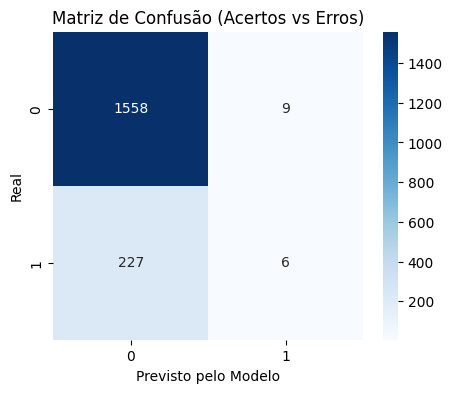

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Separar Variáveis (X) e Alvo (y)
X = df_final.drop('churn', axis=1)
y = df_final['churn']

# 2. Dividir Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Treinar a Árvore de Decisão
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

# 4. Avaliar o Resultado
y_pred = modelo.predict(X_test)
print(f"Acurácia do Modelo: {accuracy_score(y_test, y_pred):.2%}")

# Matriz de Confusão
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão (Acertos vs Erros)')
plt.ylabel('Real')
plt.xlabel('Previsto pelo Modelo')
plt.show()


# Resumo do Projeto: Análise de Churn em Telecom

Este notebook documenta o processo de Data Mining realizado para prever o cancelamento de clientes (Churn) em uma empresa de telefonia. Abaixo, explico as 4 etapas principais do exercício de forma simples e objetiva.

## 1. Entendendo o Problema (Negócio)
*   **O Desafio:** A empresa deseja entender os motivos do cancelamento de serviços. A hipótese inicial era de que o tipo de contrato influenciava diretamente na fidelidade.
*   **Os Dados:** Utilizamos um dataset com 6.000 registros contendo perfil do cliente, serviços assinados e o status final (`churn`).

## 2. Análise Exploratória (EDA)
Antes da modelagem, investigamos os dados visualmente:
*   **Tratamento de Dados:** Identificamos valores nulos em cobranças e uso de dados, que foram preenchidos estatisticamente (mediana).
*   **Validação da Hipótese:** Através de tabelas cruzadas, confirmamos que clientes com **Contrato Mensal** possuem uma taxa de cancelamento significativamente maior do que aqueles com contratos anuais.

## 3. Engenharia de Atributos 
A etapa mais crítica foi transformar os dados para que o algoritmo pudesse interpretá-los corretamente:
*   **Mapeamento Ordinal:** Em vez de usar codificação genérica, transformamos a coluna `contract` preservando sua hierarquia lógica:
    *   *Mensal* $\rightarrow$ **1** (Menor fidelidade/Maior risco)
    *   *1 Ano* $\rightarrow$ **2**
    *   *2 Anos* $\rightarrow$ **3** (Maior fidelidade/Menor risco)
*   Isso permitiu que o modelo matemático entendesse o "peso" do compromisso temporal do cliente.

## 4. Modelagem Preditiva
Utilizamos um algoritmo de **Árvore de Decisão** (*Decision Tree*):
*   **Metodologia:** Dividimos os dados em Treino (70%) e Teste (30%).
*   **Objetivo:** O modelo aprendeu os padrões dos clientes que saíram e foi testado nos dados que nunca tinha visto.
*   **Resultado:** A **Acurácia** indica a porcentagem global de acertos, e a **Matriz de Confusão** detalha onde o modelo acertou ou errou (falsos positivos/negativos).

---
**Conclusão:** O exercício demonstrou que o tratamento correto das variáveis (especialmente a transformação ordinal do contrato) é essencial para criar uma IA capaz de prever o comportamento do consumidor.
